# File to wrangle data to get the plots to finally implement as a function.

In [97]:
# Get db-data

import sys 
import os
import numpy as np
from datetime import datetime, timedelta

from flask import Flask
from flask_sqlalchemy import SQLAlchemy
app = Flask(__name__)
app.config["SQLALCHEMY_DATABASE_URI"] = "sqlite:///backend/database.db"
app.config['SQLALCHEMY_ECHO'] = True
app.config['SQLALCHEMY_TRACK_MODIFICATIONS'] = False
db = SQLAlchemy(app)

from backend.models import *

with app.app_context():
    all_data = np.array(
        db.session.execute("""
        WITH kitchendata AS (
                SELECT time, temperature AS ktemp, humidity AS khumid, airpressure AS kpressure
                FROM Temperature 
                NATURAL JOIN Humidity 
                NATURAL JOIN Airpressure
                WHERE measurer = 'kitchen'),
            balconydata AS (
                SELECT time, temperature AS btemp, humidity AS bhumid
                FROM Temperature
                NATURAL JOIN Humidity
                WHERE measurer = 'balcony'),
            bikeroomdata AS (
                SELECT time, temperature AS brtemp
                FROM Temperature
                WHERE measurer = 'bikeroom')
            SELECT kd.time, ktemp, khumid, kpressure, btemp, bhumid, brtemp
                FROM kitchendata kd
                LEFT OUTER JOIN
                    balconydata bd
                    ON kd.time = bd.time
                LEFT OUTER JOIN
                    bikeroomdata brd
                    ON kd.time = brd.time""").fetchall())
    db.session.commit()
    


2021-03-26 17:25:49,239 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-03-26 17:25:49,239 INFO sqlalchemy.engine.base.Engine 
        WITH kitchendata AS (
                SELECT time, temperature AS ktemp, humidity AS khumid, airpressure AS kpressure
                FROM Temperature 
                NATURAL JOIN Humidity 
                NATURAL JOIN Airpressure
                WHERE measurer = 'kitchen'),
            balconydata AS (
                SELECT time, temperature AS btemp, humidity AS bhumid
                FROM Temperature
                NATURAL JOIN Humidity
                WHERE measurer = 'balcony'),
            bikeroomdata AS (
                SELECT time, temperature AS brtemp
                FROM Temperature
                WHERE measurer = 'bikeroom')
            SELECT kd.time, ktemp, khumid, kpressure, btemp, bhumid, brtemp
                FROM kitchendata kd
                LEFT OUTER JOIN
                    balconydata bd
                    ON kd.

In [100]:
# Time, Kitchen temp, Kitchen humidity, Kitchen Airpressure, Balcony Temp, Balcony Humidity, Bikeroom temp
feature_names = ['date', 'kitchen temp', 'kitchen humid', 'kitchen pressure', 'balcony temp', 'balcony humid','bikeroom temp']

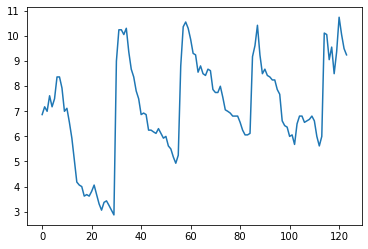

In [134]:
import matplotlib.pyplot as plt

def reduced(x):
    return x.reshape(-1,2)[:,1:].flatten()
len(all_data[:,0])
plt.plot(np.arange(0,len(all_data[:,0])),all_data[:,6])

plt.show()


In [132]:
np.arange(0,len(all_data[:,0]))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123])